Creating HARP plots for my G0.55-0.85 paper. 

Currently: Taking CO data plotting integrated intensity image and plotting vevlocities

In [1]:
# Aplpy

import os

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxesSubplot

from astropy.table import Table
import astropy.units as u
import numpy as np
import aplpy


%matplotlib inline

In [2]:
fitsfile_12co_integ = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/12co/CO_cube_field_South_1_integ.fits'
fitsfile_12co_integhigh = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/12co/CO_cube_field_South_1_cliphigh_integ.fits'
fitsfile_12co_integlow = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/12co/CO_cube_field_South_1_cliplow_integ.fits'

fitsfile_13co_integ = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/13co/ga20150604_34_2_reduced_velclip_integ_TRx.fits'


INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.510e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.714e+02 [aplpy.core]


/Users/hparsons/anaconda/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting resolution to 19.426 dpi [aplpy.core]


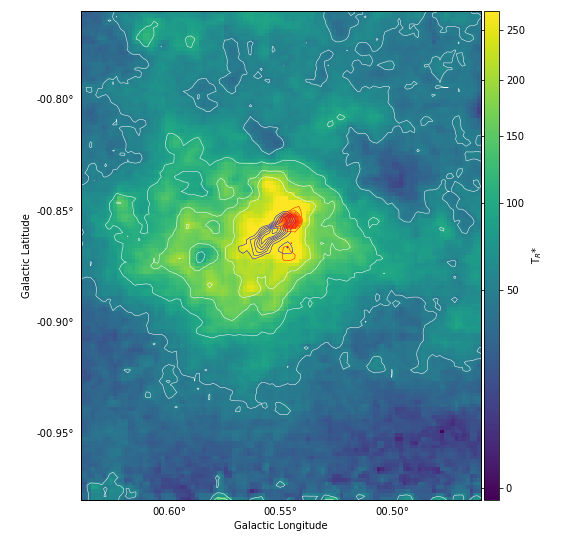

In [28]:
co_integ = aplpy.FITSFigure(fitsfile_12co_integ)

co_integ_contourlevels = np.arange(25, 160, 10)

co_integ.show_colorscale(stretch='sqrt',cmap='viridis')
co_integ.add_colorbar()
co_integ.colorbar.set_axis_label_text('T$_{R}$*')

co_integ.recenter(0.55,-0.87, width=0.18, height=0.22)

co_integ.show_contour(fitsfile_12co_integ, levels=[50,100,150,200], colors='white', linewidths=0.5)
co_integ.show_contour(fitsfile_12co_integhigh, levels=co_integ_contourlevels, colors='blue', linewidths=0.5)
co_integ.show_contour(fitsfile_12co_integlow, levels=co_integ_contourlevels, colors='red', linewidths=0.5)

co_integ.tick_labels.set_xformat('ddd.dd')
co_integ.tick_labels.set_yformat('ddd.dd')

co_integ.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-integ-contours.pdf')
co_integ.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-integ-contours.png')